In [238]:
#Ex 2. Import relevant python libraries and sklearn linear_model  

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [284]:
#Load the carmpg database
df = pd.read_csv('E:/ML/AI ML docs/carMPG.csv')

In [240]:
#show the frist five row from carMPG file
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [241]:
#Display the data type of all columns
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [242]:
#Describe the basic info from carMPG file, count, mean, std,min etc.
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [285]:
#Identify target variable and independent variable. 
df = pd.DataFrame(df, columns=['MPG', 'Acceleration'])

In [244]:
df.head()

,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [271]:
#Display the in arrary

x=np.array(df.drop(['MPG'],1))

In [272]:
x

array([[12. ],
       [11.5],
       [11. ],
       [12. ],
       [10.5],
       [10. ],
       [ 9. ],
       [ 8.5],
       [10. ],
       [ 8.5],
       [10. ],
       [ 8. ],
       [ 9.5],
       [10. ],
       [15. ],
       [15.5],
       [15.5],
       [16. ],
       [14.5],
       [20.5],
       [17.5],
       [14.5],
       [17.5],
       [12.5],
       [15. ],
       [14. ],
       [15. ],
       [13.5],
       [18.5],
       [14.5],
       [15.5],
       [14. ],
       [19. ],
       [13. ],
       [15.5],
       [15.5],
       [15.5],
       [15.5],
       [12. ],
       [11.5],
       [13.5],
       [13. ],
       [11.5],
       [12. ],
       [12. ],
       [13.5],
       [19. ],
       [15. ],
       [14.5],
       [14. ],
       [14. ],
       [19.5],
       [14.5],
       [19. ],
       [18. ],
       [19. ],
       [20.5],
       [15.5],
       [17. ],
       [23.5],
       [19.5],
       [16.5],
       [12. ],
       [12. ],
       [13.5],
       [13. ],
       [11

In [266]:
#Display the MPG in arrary 
y=np.array(df['MPG'])

In [249]:
y

array([ 8. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [251]:
#Split the file into train [80%] and test [20%] data 

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [268]:
print(x_train.shape)

(318, 1)


In [269]:
print(y_train.shape)

(318,)


In [254]:
y_test

array([33.5, 19. , 18. , 26. , 27.5, 13. , 14. , 14. , 32.8, 14. , 17. ,
       24. , 16.5, 37. , 22. , 18.5, 11. , 16. , 31.6, 14. , 30.5, 13. ,
       26. , 17. , 26.4, 26. , 21. , 21. , 29. , 39.1, 20.3, 25. , 20.2,
       23.8, 34. , 20.5, 26. , 28. , 14. , 16. , 18.5, 23. , 37.2, 26.6,
       24. , 26. , 26. , 17.5, 28.1, 31. , 19. , 14. , 13. , 14. , 22. ,
       25.5, 23.5, 21. , 34.3, 20. , 38.1, 22. , 34. , 35. , 12. , 15. ,
       34.1, 19. , 31. , 19. , 30. , 32.1, 31. , 14. , 31.9, 37.7, 18.1,
       15. , 13. , 14.5])

In [255]:
#x_test

In [256]:
#Create linear regression object

regmodel=linear_model.LinearRegression()

In [257]:
#Fit the x_train and y_train in model (#regmodel.fit(x,y))
#Train the model using the training sets  
regmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [275]:
regmodel.predict(31.0)

array([41.14490782])

In [258]:
#Coefficients
#Ex 6. Display the coefficients coef, intercept and residues
regmodel.coef_

array([1.14303423])

In [259]:
#Fit the x_train and y_train in model (#regmodel.fit(x,y))
#regmodel.fit(x_train, y_train)

In [260]:
#Intercept
#Ex 6. Display the coefficients coef, intercept and residues
regmodel.intercept_

5.710846558969429

In [261]:
#Ex 6. Display the coefficients coef, intercept and residues
# Accuracy check for carMPG
#Coefficients * acceleration + intercept

CarMPG = 1.20302282 * 19.0 + 4.975072087084243

In [262]:
CarMPG

27.83250566708424

In [263]:
#Ex 7. Predict using test data  
regmodel.score(x_test, y_test)

0.24948983176053008

In [287]:
#regmodel_y_pred = regmodel.predict(x_test)

In [291]:
#regmodel_y_pred

In [312]:
#Display using scatter plot the data points and the best fit line 
#plt.scatter(x_test, y_test, color='green')
#plt.plot(x_test,regmodel_y_pred,color = 'red', linwidth=8)
plt.show()

In [308]:
y_pred = regmodel.predict(x_test)

In [309]:
y_pred

array([20.79889845, 20.57029161, 22.28484296, 23.42787719, 21.94193269,
       19.42725737, 20.57029161, 21.14180872, 27.88571071, 14.85512043,
       29.71456548, 22.85636007, 20.79889845, 26.51406962, 23.99939431,
       20.57029161, 18.28422314, 22.28484296, 26.62837305, 21.14180872,
       21.82762926, 19.42725737, 19.99877449, 23.42787719, 26.3997662 ,
       23.42787719, 25.14242854, 22.85636007, 23.99939431, 25.02812512,
       23.88509089, 25.02812512, 23.77078746, 25.82824908, 25.02812512,
       25.37103539, 24.57091143, 26.97128332, 22.28484296, 18.39852656,
       24.22800116, 25.59964224, 24.456608  , 27.42849701, 25.82824908,
       29.14304836, 22.28484296, 26.05685593, 29.02874494, 24.22800116,
       30.74329629, 23.99939431, 20.57029161, 22.28484296, 27.42849701,
       23.77078746, 20.11307791, 23.99939431, 23.77078746, 21.71332584,
       27.19989017, 22.28484296, 26.28546278, 22.9706635 , 19.99877449,
       15.42663755, 23.99939431, 23.99939431, 25.82824908, 23.42

In [306]:
from sklearn.metrics import mean_squared_error, r2_score

#print('Coefficients: \n', regmodel.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
 #     % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

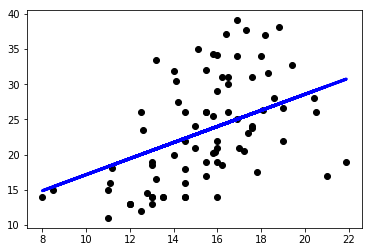

In [313]:
#Display using scatter plot the data points and the best fit line 
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()